# Machine Learning Project using Online Retail dataset 
##### Prepared by: Kisha Taylor
##### Date : Oct. 2, 2019

Marketing Analytics -Unsupervised Learning clustering algorithmn.

Objective : We are performing customer segmentation based on key attributes Recency, Frequency & Monetary (RFM) using K-means. 



#### What is customer segmentation and why bother ?
**What is customer segmentation ?**
Customer segmentation is the division of customers into various groups based on specific attributes.
Segmenation Types may vary based on these four main characteristics/variable-types:
    1. Demographics (eg. age, incme, gender etc.) 
    2. Geographic regions (eg. country, region, city, town etc.)
    3. Psychographic (eg. interests, personality traits, attitudes, views )
    4. Behaviour (eg. actual spending pattern/actual purchases)

**Benefits of Sementation**

Marketers segment customers because it allows them to better understand the various types of customers and 
hence better serve their needs to ultimately yield increase in revenue. Better served customers are happier customers
and happier customers spend more leading to a more favourle company bottom-line.

So, in short, if we adopt a more tailored approach to they way we market products/services to our customer 
the customers feel more valued and the company benefits financially. This bets the one-size fits all approach
(when no differentiation is made among customers). 

This segmentation of customers also helps companies to identify customers that are their most valuable customers 
and hence direct more efforts at those customers and less on the customers that have been the least profitable.
Segmentation based on behaviour (type #4 above) offers this approach where, based on attributes such as :
    (i)   Recency (R)        - the last time a purchase was made
    (ii)  Frequency (F)      - the cummulative number of transactions conducted.
    (iii) Monetary Value (M) - the total cummulative amount spent.
                                 
This is known as **RFM segmentation and scoring.** 

#### Our work will be focused on RFM using K-Means Machine Learning Clustering technique.
                                 



### <font color =blue> Methodology for Model Building
### Steps : 
 1. Problem Definition
 
 2. Data Collection 
     - Dataset : Online retail dataset (source:http://archive.ics.uci.edu/ml/datasets/online+retail)
     
 3. Data Preparation 
 
     (i)   Data Exloration
     
     (ii)  Data Cleaning
     
     (iii)  Data Analysis
     
      (iv)  Feature Selection
            - Identify Recency, Frequency & Monetary Value features (RFM)
      
      (v)  Data Preprocessing
     
           - Scale features
           
 
 5. Perform K-Means clustering based on RFM features
 
 6. Choose optimal K clusters  
           - uses Elbow method (visualization of average distance across clusters for k number of clusters,
             choosing the cluster kn where kn+1 reflects a marginal decrease in the avg. distance )

       
 7. Identify best customers, valuable customers at highest risk of churn
 
 
 

#### Main Python Libraries used:
1. pandas - mainly for EDA
2. numpy  - mainly for EDA
3. sklearn - machine learning
4. Matplotlib - visualizations

### About the dataset
According to the website for the UCI repository (ref. https://archive.ics.uci.edu/ml/datasets/Online+Retail),
this transactional dataset reflects transactions (approx. 1 year's worth) effected between 01/12/2010 and 09/12/2011
for a registered non-store online retail based in the UK.

**Attributes** : 

    1. InvoiceNo   : Invoice number -uniquely identifies the transaction.
                     - Nominal, a 6-digit integral number; Code starting with letter 'c' indicates a cancellation.  
                                      
    2. StockCode   : Product (item) code - uniquely identifies each product.
                     - Nominal, a 5-digit integral number
    3. Description: Name of the product. Nominal.
                   
    4. Quantity    : # of units of the product per transaction. Numeric.
            
    5. InvoiceDate : Date and time of the invoice (transaction date & time). Numeric.
            
    6. UnitPrice   : Selling price per unit in sterling.- Numeric                                    
            
    7. CustomerID  : Unique indentifier for each customer. Nominal, a 5-digit integral number.                                              
    8. Country     : Country name. Nominal, Customer's country of residence.                                                                                            

### Data Collection
Let's load the data

In [1]:
# Ref.: https://www.blastam.com/blog/rfm-analysis-boosts-sales
#      https://towardsdatascience.com/find-your-best-customers-with-customer-segmentation-in-python-61d602f9eee6  

# Main Ref. : https://towardsdatascience.com/apply-rfm-principles-to-cluster-customers-with-k-means-fef9bcc9ab16
# Ref. : "Marketing Data Science: Modeling Techniques in Predictive Analytics with R and Python by Thomas W. Miller"

import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import os

In [2]:
os.getcwd()

'C:\\Users\\Kisha\\Documents\\Python Scripts\\Class Imbalance Prob'

In [3]:
path =  "C:/Users/Kisha/Documents/Datasets/Online Retail.xlsx"
df = pd.read_excel(path)

## Data Preparation
#### Data Exploration

In [4]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


What is our dataset size? How big is it (# rows)?

In [5]:
df.shape

(541909, 8)

In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Checking to see how many transaction have a neg unit price

In [7]:
len(df[df["UnitPrice"]<0])

2

Let's delete those or rather subset for only those that have a non-negative UnitPrice

In [8]:
df = df[df["UnitPrice"]>=0]

In [9]:
### Let's look to see if we hae any missing values per feature
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135078
Country             0
dtype: int64

We note that we have missing values for the description and for customer ID.

In [10]:
#### Let's examine rows where CustomerID is missing more closely. Looking at the first 5 such rows.

df.loc[np.where(df["CustomerID"].isnull())].head(5)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


We cannot use these rows that are missing customerID in our analysis.
So for now we will filter out these rows.


In [26]:
newdf = df[pd.notnull(df["CustomerID"])]





Note missing values checked again after filtering out 
those rows with missing values for CustomerID

In [27]:
newdf.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [28]:
newdf.shape

(406829, 8)

We lost the following % of our data due to missing info. :

In [29]:
(df.shape[0]-newdf.shape[0])*100/df.shape[0]

24.92641726347879

Let's get more familiar with our data
by getting a feel for :

    (i)   the number of different products
    (ii)  Range of quantities purchased
    (iii) Range of prices
    (iv)  Number of Countries
    (iv)  Groupings of customers by country and or by products purchased
    

Number of different products

In [30]:
len(newdf["StockCode"].unique())

3684

In [31]:

newdf["StockCode"].head(5)

0    85123A
1     71053
2    84406B
3    84029G
4    84029E
Name: StockCode, dtype: object

Top 5 products sold (by count )

In [32]:
ProdSales = newdf.groupby(["StockCode","Description"])["Quantity"].aggregate('sum').reset_index().sort_values(["Quantity"],ascending=False)
ProdSales.columns = ["StockCode","Description","Sum of Qty sold"]
ProdSales.head(5)

,StockCode,Description,Sum of Qty sold
2712,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
3586,85099B,JUMBO BAG RED RETROSPOT,45066
2818,84879,ASSORTED COLOUR BIRD ORNAMENT,35314
3593,85123A,WHITE HANGING HEART T-LIGHT HOLDER,34147
361,21212,PACK OF 72 RETROSPOT CAKE CASES,33409


In [33]:
CustCountry = newdf.groupby(["Country"])["InvoiceNo"].count().reset_index().sort_values(["InvoiceNo"],ascending=False)
CustCountry.columns = ["Country", "Count of transactions per country"]
CustCountry.head(5)

,Country,Count of transactions per country
35,United Kingdom,361878
14,Germany,9495
13,France,8491
10,EIRE,7485
30,Spain,2533


Top 5 sales (revenue) by country

In [34]:
newdf["SalesAmt_per_Invoice"] = newdf["UnitPrice"] * newdf["Quantity"] 
CountrySales = newdf.groupby("Country")["SalesAmt_per_Invoice"].aggregate("sum").reset_index().sort_values(["SalesAmt_per_Invoice"],ascending=False)
CountrySales.columns =["Country", "Total Sales $"]
CountrySales.head(5)

C:\Users\Kisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Country,Total Sales $
35,United Kingdom,6.767873e+06
23,Netherlands,2.846615e+05
10,EIRE,2.502852e+05
14,Germany,2.216982e+05
13,France,1.967128e+05


Group by product type & count of customers

In [35]:
pd.DataFrame(newdf.groupby(["StockCode","Description"])["CustomerID"].count()).sort_values(["CustomerID"],ascending=False).head(10)
#CountrySales.columns =["Country", "Total Sales $"]
#CountrySales.head(5)

,,CustomerID
StockCode,Description,
85123A,WHITE HANGING HEART T-LIGHT HOLDER,2070
22423,REGENCY CAKESTAND 3 TIER,1905
85099B,JUMBO BAG RED RETROSPOT,1662
84879,ASSORTED COLOUR BIRD ORNAMENT,1418
47566,PARTY BUNTING,1416
20725,LUNCH BAG RED RETROSPOT,1358
22720,SET OF 3 CAKE TINS PANTRY DESIGN,1232
POST,POSTAGE,1196
20727,LUNCH BAG BLACK SKULL.,1126


Top 5 Selling products

In [36]:
pd.DataFrame(newdf.groupby(["StockCode","Description"])["Quantity"].sum()).sort_values(["Quantity"],ascending=False).head(10)

,,Quantity
StockCode,Description,
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
85099B,JUMBO BAG RED RETROSPOT,45066
84879,ASSORTED COLOUR BIRD ORNAMENT,35314
85123A,WHITE HANGING HEART T-LIGHT HOLDER,34147
21212,PACK OF 72 RETROSPOT CAKE CASES,33409
22197,POPCORN HOLDER,30504
23084,RABBIT NIGHT LIGHT,27094
22492,MINI PAINT SET VINTAGE,25880
22616,PACK OF 12 LONDON TISSUES,25321


Products that have been returned in a different period 
from which they were purchsed would have an overal negative qty.

This the five (5) worst selling products (reflecting net returns for that period)

In [37]:
pd.DataFrame(newdf.groupby(["StockCode","Description"])["Quantity"].sum()).sort_values(["Quantity"],ascending=True).head(5)

,,Quantity
StockCode,Description,
84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-1460
D,Discount,-1194
21645,ASSORTED TUTTI FRUTTI ROUND BOX,-24
CRUK,CRUK Commission,-16
21144,PINK POODLE HANGING DECORATION,-12


In [38]:
newdf["Quantity"].describe()

count    406829.000000
mean         12.061303
std         248.693370
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

Note from above, most transaction have a purchase quantity below 12 
(since 12 is at the 75th percentile)

Visual of the range of quantity values, reflecting most transactions with the range 0 to below 10,000


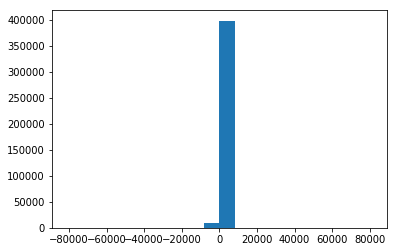

In [39]:
plt.hist(newdf["Quantity"],bins=20)
plt.show()

**Recall boxplot diagrams**

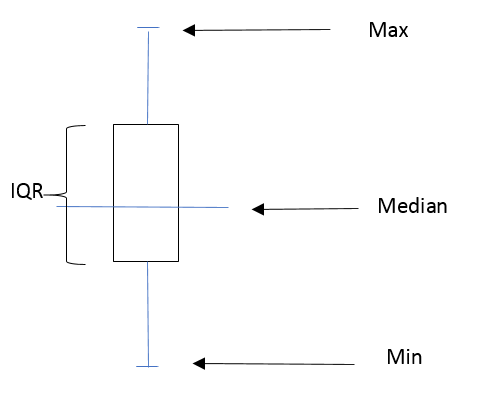

This boxplot visualization (below) confirms that the transactions (qty.)
typically range below 20k positve and negative.
Note the outliers are in the 70k to 80k range with the median close to zero.

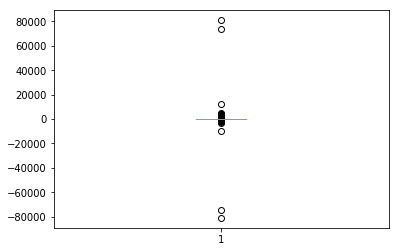

In [40]:
plt.boxplot(newdf["Quantity"])
plt.show()

Range of prices


In [41]:
newdf["UnitPrice"].describe()

count    406829.000000
mean          3.460471
std          69.315162
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

Note from statsistical description above for Unit Price
75% of all products are priced below $3.75. 

The mean unit price is \$3.46 and 50% of all products are priced below $1.95.

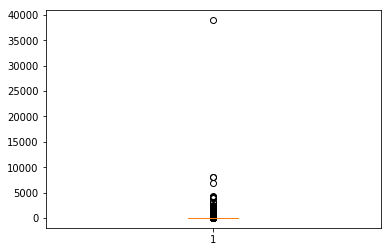

In [42]:
plt.boxplot(newdf["UnitPrice"])
plt.show()

Number of different countries

In [43]:
len(newdf["Country"].unique())

37

Groupings of customers by country
(Percentage)


In [44]:
CustCountry = newdf.groupby(["Country"])["CustomerID"].aggregate('count').reset_index().sort_values(["CustomerID"],ascending=False)
CustCountry.columns = ["Country","CustomerID-Count"]
CustCountry["CustomerID-Count in Perc %"] = CustCountry["CustomerID-Count"]*100/sum(CustCountry["CustomerID-Count"])
CustCountry.head(10)

,Country,CustomerID-Count,CustomerID-Count in Perc %
35,United Kingdom,361878,88.950886
14,Germany,9495,2.333904
13,France,8491,2.087118
10,EIRE,7485,1.839839
30,Spain,2533,0.622620
23,Netherlands,2371,0.582800
3,Belgium,2069,0.508567
32,Switzerland,1877,0.461373
26,Portugal,1480,0.363789
0,Australia,1259,0.309467


We will calculate each required feature starting with:
- Recency
Let's calculate using the report date as 1 day after the last invoice date

In [45]:
# Last invoice date
import datetime as dt

newdf["InvoiceDate"].max()



Timestamp('2011-12-09 12:50:00')

In [46]:
# So, let's set our report date, from which calculations will be done to 1 day ahead.
reportdate = dt.datetime(2011,12,10)
reportdate

datetime.datetime(2011, 12, 10, 0, 0)

In [47]:
newdf.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SalesAmt_per_Invoice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [48]:
#newdf['InvoiceDate'] = pd.to_datetime(newdf['InvoiceDate'])
RFM_df =newdf.groupby("CustomerID").aggregate({"InvoiceDate" : lambda x:(reportdate-x.max()).days,"InvoiceNo" : lambda x:x.count(),"SalesAmt_per_Invoice" : lambda x:sum(x)}).reset_index()
RFM_df.columns = ["CustID","R","F","M"]
RFM_df.head(5)

,CustID,R,F,M
0,12346.0,325,2,0.00
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


Let's now calculate the RFM metric (scores) for each customer.

We will do this by first splitting into quantiles
then ranking the quantiles for each sub-metric (R, F & M).

**Recency ranking**
Let's rank by quartiles where the upper quartiles for the recency defned as being worse than the lower quartiles. This means that for Q1 that represents the group the lowest 25% recency score this group is the better than the Q2 which has higher recency scores. Recall, we place a higher value on customers who have purchased from us more recently (as depicted by their recency score) than customers who have purchased from us less recently.

**Frequency & Monetary value ranking**
These scores will be ranked opposite to recency since the greater the score the better or more highly we value that customer.


In [49]:
newdf.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'SalesAmt_per_Invoice'],
      dtype='object')

Let's find out the levels of Recency , Freq. & Monetray value for each quantile Q1,Q2 & Q3

In [50]:
qrt = RFM_df.quantile(q=[0.25,0.5,0.75])
qrt.columns =["CustID","R","F","M"]

Rqrt = qrt["R"]
Fqrt = qrt["F"]
MVqrt = qrt["M"]

print(qrt)
print("\n")

print("RFM scores\n",RFM_df.head(2))


        CustID      R      F          M
0.25  13812.75   16.0   17.0   293.3625
0.50  15300.50   50.0   42.0   648.0750
0.75  16778.25  143.0  102.0  1611.7250


RFM scores
     CustID    R    F       M
0  12346.0  325    2     0.0
1  12347.0    2  182  4310.0


Let's further rank 1 to 4 for the quantiles as described earlier.



In [51]:
copyRFM = RFM_df
print(copyRFM.head(5))

    CustID    R    F        M
0  12346.0  325    2     0.00
1  12347.0    2  182  4310.00
2  12348.0   75   31  1797.24
3  12349.0   18   73  1757.55
4  12350.0  310   17   334.40


In [53]:

rk = RFM_df
print(rk.head(5))
print(RFM_df.head(5))

    CustID    R    F        M
0  12346.0  325    2     0.00
1  12347.0    2  182  4310.00
2  12348.0   75   31  1797.24
3  12349.0   18   73  1757.55
4  12350.0  310   17   334.40
    CustID    R    F        M
0  12346.0  325    2     0.00
1  12347.0    2  182  4310.00
2  12348.0   75   31  1797.24
3  12349.0   18   73  1757.55
4  12350.0  310   17   334.40


#### Recall, as explained earlier, the lowest rank is the best for each metric

In [54]:
def myfun(x,mtype):
    
    if mtype == "R":
        if (x <= qrt.loc[0.25][mtype]):
            rank = 1
            return(rank)
    
        elif ((x > qrt.loc[0.25][mtype]) & (x <= qrt.loc[0.5][mtype])):
            rank = 2
            return(rank)
    
        elif ((x > qrt.loc[0.5][mtype]) & (x <= qrt.loc[0.75][mtype])):
            rank = 3
            return(rank)

        elif (x > qrt.loc[0.75][mtype]) :
            rank = 4
            return(rank)
    else:
        if (x <= qrt.loc[0.25][mtype]):
            rank = 4
            return(rank)
    
        elif ((x > qrt.loc[0.25][mtype]) & (x <= qrt.loc[0.5][mtype])):
            rank = 3
            return(rank)
    
        elif ((x > qrt.loc[0.5][mtype]) & (x <= qrt.loc[0.75][mtype])):
            rank = 2
            return(rank)

        elif (x > qrt.loc[0.75][mtype]) :
            rank = 1
            return(rank)
         
rk["R"] = rk["R"].apply(myfun,args="R").values
rk["F"] = rk["F"].apply(myfun,args="F").values
rk["M"] = rk["M"].apply(myfun,args="M").values

In [55]:
#rk.head(5)

rk["RFM"] = rk["R"].map(str)+ rk["F"].map(str) + rk["M"].map(str)


In [56]:
rk.head(5)

,CustID,R,F,M,RFM
0,12346.0,4,4,4,444
1,12347.0,1,1,1,111
2,12348.0,3,3,1,331
3,12349.0,2,2,1,221
4,12350.0,4,4,3,443


In [57]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)

clusters = kmeans.fit_predict(rk.iloc[:,1:5])
clusters

array([3, 2, 1, ..., 2, 2, 0])

In [58]:
rk["ClusterIndx"] = clusters
rk.head(5)

,CustID,R,F,M,RFM,ClusterIndx
0,12346.0,4,4,4,444,3
1,12347.0,1,1,1,111,2
2,12348.0,3,3,1,331,1
3,12349.0,2,2,1,221,0
4,12350.0,4,4,3,443,3


##### Choosing optimal K clusters :
           - uses Elbow method (visualization of average distance across clusters for k number of clusters,
             choosing the cluster kn where kn+1 reflects a marginal decrease in the avg. distance )

[105.01030869294542, 52.74187689279378, 30.424566307170487, 9.053430012633756, 7.872599089379112, 6.838711380099015, 5.829369723762046, 5.129785658136272, 3.9452358631617064]


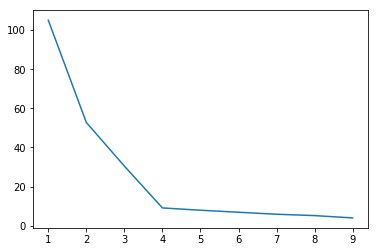

In [59]:
# Finding Optimal clusters
# Using elbow method
#https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
from scipy.spatial.distance import cdist

TotDist = [] 
X = rk.iloc[:,1:5]
Npts = X.shape[0]

K = range(1,10) 
  
for k in K: 
    kM = KMeans(n_clusters=k).fit(X) 
    kM.fit(X)     
    TotDist.append(sum(np.min(cdist(X, kM.cluster_centers_, 
                      'euclidean'),axis=1)) / Npts) 
    
print(TotDist)
plt.plot(K,TotDist)
plt.show()


##### Optimal K is the pt after which the avg. of TotDist does not decrease by much, soon flattens out "at the elbow".
This optmal K for us is K= 4 (as shown in the graph above)

In [60]:
rk.head(10).sort_values("ClusterIndx")

,CustID,R,F,M,RFM,ClusterIndx
3,12349.0,2,2,1,221,0
5,12352.0,2,2,2,222,0
9,12356.0,2,2,1,221,0
2,12348.0,3,3,1,331,1
1,12347.0,1,1,1,111,2
0,12346.0,4,4,4,444,3
4,12350.0,4,4,3,443,3
6,12353.0,4,4,4,444,3
7,12354.0,4,2,2,422,3
8,12355.0,4,4,3,443,3


In [65]:
rk["ClusterName"]  =  rk["ClusterIndx"]
rk.loc[rk["ClusterIndx"]==3,"ClusterName"] = 4
rk.loc[rk["ClusterIndx"]==2,"ClusterName"] = 1
rk.loc[rk["ClusterIndx"]==1,"ClusterName"] = 3
rk.loc[rk["ClusterIndx"]==0,"ClusterName"] = 2

rk["ClusterDesc"]  =  rk["ClusterIndx"]
rk.loc[rk["ClusterIndx"]==3,"ClusterDesc"] = "Worst- Low Budget, rare shopper & near churn"
rk.loc[rk["ClusterIndx"]==2,"ClusterDesc"] = "Best - Gotta Keep"
rk.loc[rk["ClusterIndx"]==1,"ClusterDesc"] = "Low Budget, rare shopper"
rk.loc[rk["ClusterIndx"]==0,"ClusterDesc"] = "2nd Best - Loyal Low Budget Spender"


In [66]:
rk.head(10).sort_values("ClusterDesc")

,CustID,R,F,M,RFM,ClusterIndx,ClusterName,ClusterDesc
3,12349.0,2,2,1,221,0,2,2nd Best - Loyal Low Budget Spender
5,12352.0,2,2,2,222,0,2,2nd Best - Loyal Low Budget Spender
9,12356.0,2,2,1,221,0,2,2nd Best - Loyal Low Budget Spender
1,12347.0,1,1,1,111,2,1,Best - Gotta Keep
2,12348.0,3,3,1,331,1,3,"Low Budget, rare shopper"
0,12346.0,4,4,4,444,3,4,"Worst- Low Budget, rare shopper & near churn"
4,12350.0,4,4,3,443,3,4,"Worst- Low Budget, rare shopper & near churn"
6,12353.0,4,4,4,444,3,4,"Worst- Low Budget, rare shopper & near churn"
7,12354.0,4,2,2,422,3,4,"Worst- Low Budget, rare shopper & near churn"
8,12355.0,4,4,3,443,3,4,"Worst- Low Budget, rare shopper & near churn"


In [67]:
# Let's count the number of customers in each segment
rf_df = rk.groupby(["ClusterDesc"])["CustID"].aggregate("count").reset_index().sort_values("CustID")
rf_df.columns = ["ClusterDesc","Count_Of_CustID"]
rf_df["Perc_Cust"] = rf_df["Count_Of_CustID"]*100/rf_df["Count_Of_CustID"].sum()


In [68]:
rf_df

,ClusterDesc,Count_Of_CustID,Perc_Cust
2,"Low Budget, rare shopper",1064,24.336688
3,"Worst- Low Budget, rare shopper & near churn",1085,24.817017
1,Best - Gotta Keep,1096,25.068618
0,2nd Best - Loyal Low Budget Spender,1127,25.777676


##### Conclusion
We have segmented our customer base into 4 distinct groups shown above.
The group names indicate the value of the customer. 

Note also, that the groups are roughly evenly divided. 
We can now focus our marketing efforts mainly towrds our higher valued customer groups :
    (i) "Best- Gotta keep" 
    (ii) "2nd Best - Loyal Low Budget Spender"
Given that we now know the recency, frequency and total spent amount for these customers we can 
tailor our marketing accordingly.





##### The End
